In [1]:
import numpy as np
import cv2

# read image
img = cv2.imread('sample.jpg', 0)# IMREAD_GRAYSCALE, IMREAD_COLOR

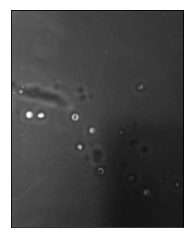

In [2]:
%matplotlib inline

from matplotlib import pyplot as plt

plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()


# 1. “亮点”缺陷检测
Detect part of defects by pre-process

In [3]:
equ = cv2.equalizeHist(img)# Histograms Equalization

In [28]:
ret2,img_th2 = cv2.threshold(img,150,255,cv2.THRESH_BINARY)

In [39]:
_, contours, _ = cv2.findContours(img_th2.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
im = cv2.imread('sample.jpg', cv2.IMREAD_COLOR)# IMREAD_GRAYSCALE, IMREAD_COLOR
cv2.drawContours(im,contours,-1,(255,0,0),5)

array([[[126, 118, 141],
        [125, 117, 140],
        [123, 115, 138],
        ..., 
        [ 84,  83,  99],
        [ 84,  83,  99],
        [ 83,  82,  98]],

       [[126, 118, 141],
        [125, 118, 139],
        [125, 118, 139],
        ..., 
        [ 83,  82,  98],
        [ 82,  81,  97],
        [ 82,  81,  97]],

       [[127, 120, 141],
        [126, 119, 140],
        [126, 119, 140],
        ..., 
        [ 82,  81,  97],
        [ 82,  81,  97],
        [ 82,  81,  97]],

       ..., 
       [[ 97, 100, 115],
        [ 99, 102, 117],
        [100, 103, 118],
        ..., 
        [ 59,  62,  77],
        [ 61,  64,  79],
        [ 60,  63,  78]],

       [[ 99, 102, 117],
        [100, 103, 118],
        [101, 104, 119],
        ..., 
        [ 58,  61,  76],
        [ 60,  63,  78],
        [ 59,  62,  77]],

       [[100, 103, 118],
        [101, 104, 119],
        [102, 105, 120],
        ..., 
        [ 57,  60,  75],
        [ 59,  62,  77],
        [ 59,  62,

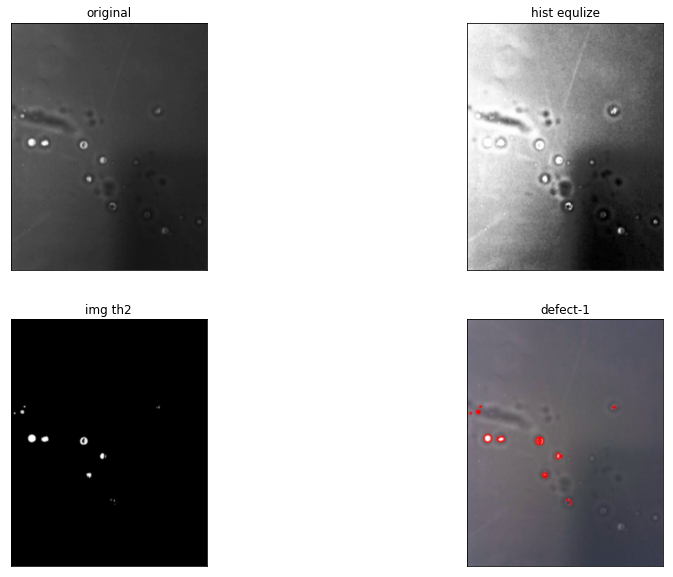

In [40]:
%matplotlib inline

from matplotlib import pyplot as plt
width = 15
height = 10
plt.figure(figsize=(width, height))


plt.subplot(2, 2, 1) 
plt.title('original')
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis

plt.subplot(2, 2, 2) 
plt.title('hist equlize')
plt.imshow(equ, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis

plt.subplot(2, 2, 3) 
plt.title('img th2')
plt.imshow(img_th2, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis

plt.subplot(2, 2, 4) 
plt.title('defect-1')
plt.imshow(im, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis



plt.show()





# 2. “阴影点”缺陷检测
Detect others by removing part of shadowimage

In [85]:
# read image
img2 = cv2.imread('sample_2.jpg', 0)# IMREAD_GRAYSCALE, IMREAD_COLOR

# average
blur2 = cv2.blur(img2,(5,5))


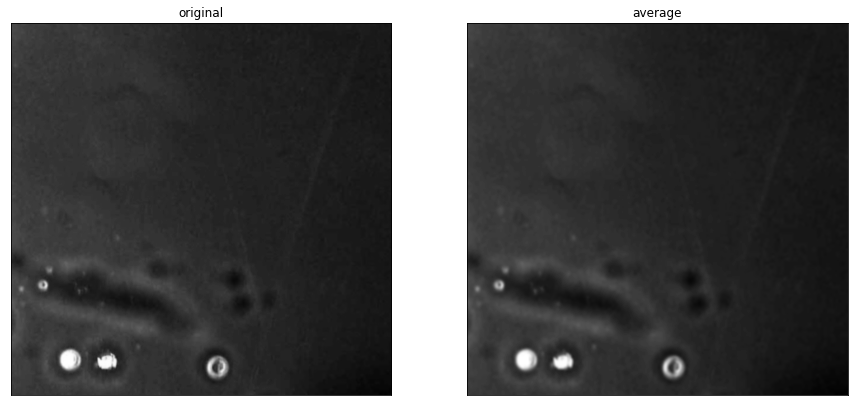

In [86]:
%matplotlib inline

from matplotlib import pyplot as plt

width = 15
height = 10
plt.figure(figsize=(width, height))


plt.subplot(1, 2, 1) 
plt.title('original')
plt.imshow(img2, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis

plt.subplot(1, 2, 2) 
plt.title('average')
plt.imshow(blur2, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis

plt.show()

In [89]:
equ2 = cv2.equalizeHist(blur2)# Histograms Equalization
ret2,img2_th2 = cv2.threshold(equ2,100,255,cv2.THRESH_BINARY)

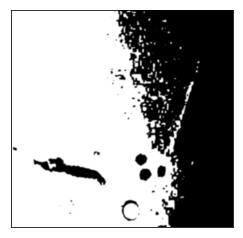

In [90]:
plt.imshow(img2_th2, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [178]:
# revert color

img2_th2_rvt =  cv2.bitwise_not(img2_th2)


In [179]:
# erode

kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(6, 6))  
dilate2 = cv2.dilate(img2_th2_rvt, kernel)
eroded2 = cv2.erode(dilate2,kernel)  

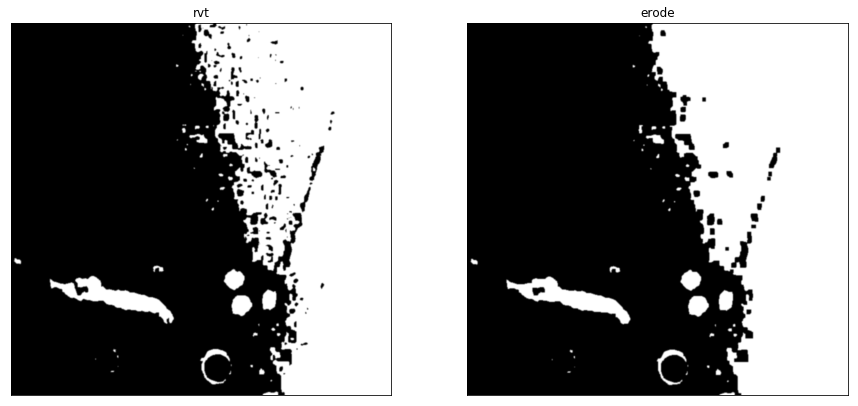

In [180]:
%matplotlib inline

from matplotlib import pyplot as plt

width = 15
height = 10
plt.figure(figsize=(width, height))


plt.subplot(1, 2, 1) 
plt.title('rvt')
plt.imshow(img2_th2_rvt, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis

plt.subplot(1, 2, 2) 
plt.title('erode')
plt.imshow(eroded2, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis

plt.show()

In [181]:
_, contours, _ = cv2.findContours(eroded2.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

selected_contours = []
for c in contours:
    area = cv2.contourArea(c)
    perimeter = cv2.arcLength(c, True)# 周长
    if(area>620 and perimeter<1000 and area/perimeter>5):
        selected_contours.append(c)
        print('area={0}, perimeter={1}'.format(area, perimeter))
len(selected_contours)

area=872.0, perimeter=114.911687016
area=630.0, perimeter=99.9411252737
area=5425.5, perimeter=527.889388919
area=796.5, perimeter=110.468035698


4

In [182]:
im2 = cv2.imread('sample_2.jpg', cv2.IMREAD_COLOR)# IMREAD_GRAYSCALE, IMREAD_COLOR
cv2.drawContours(im2,selected_contours,-1,(255,0,0),5)

array([[[128, 122, 139],
        [126, 120, 137],
        [126, 120, 137],
        ..., 
        [ 90,  89, 105],
        [ 90,  89, 105],
        [ 91,  90, 106]],

       [[129, 123, 140],
        [127, 121, 138],
        [126, 120, 137],
        ..., 
        [ 90,  89, 105],
        [ 90,  89, 105],
        [ 90,  89, 105]],

       [[130, 124, 141],
        [128, 122, 139],
        [126, 120, 137],
        ..., 
        [ 90,  89, 105],
        [ 90,  89, 105],
        [ 90,  89, 105]],

       ..., 
       [[119, 115, 126],
        [117, 113, 124],
        [118, 114, 125],
        ..., 
        [ 76,  79,  83],
        [ 76,  79,  83],
        [ 76,  79,  83]],

       [[119, 115, 126],
        [118, 114, 125],
        [118, 114, 125],
        ..., 
        [ 76,  79,  83],
        [ 77,  80,  84],
        [ 76,  79,  83]],

       [[118, 115, 124],
        [118, 115, 124],
        [118, 114, 125],
        ..., 
        [ 75,  78,  82],
        [ 75,  78,  82],
        [ 75,  78,

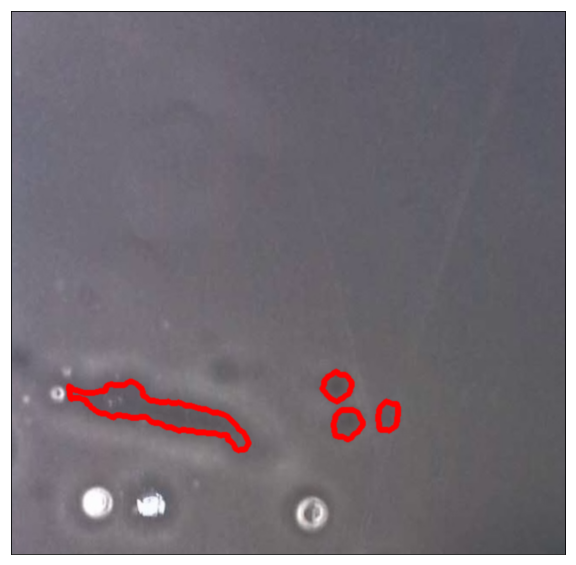

In [183]:
width = 15
height = 10
plt.figure(figsize=(width, height))

plt.imshow(im2, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

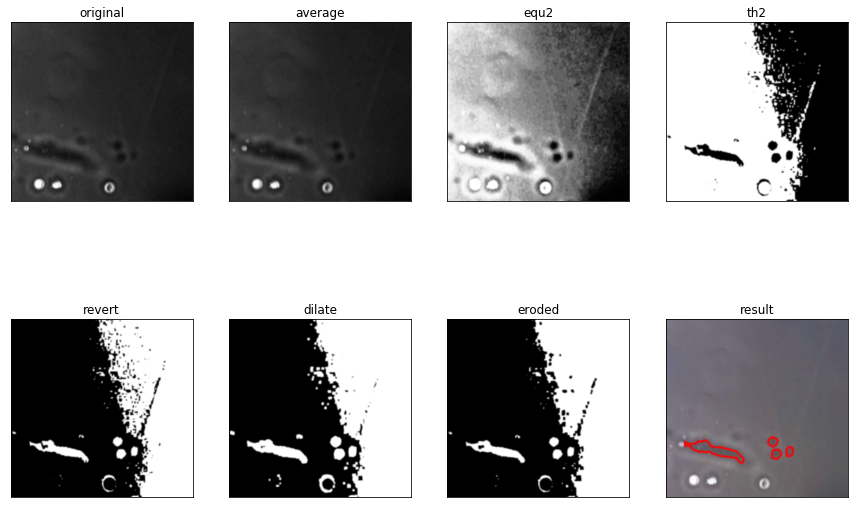

In [184]:
%matplotlib inline

from matplotlib import pyplot as plt

width = 15
height = 10
plt.figure(figsize=(width, height))


plt.subplot(2, 4, 1) 
plt.title('original')
plt.imshow(img2, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis

plt.subplot(2, 4, 2) 
plt.title('average')
plt.imshow(blur2, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis


plt.subplot(2,4,3) 
plt.title('equ2')
plt.imshow(equ2, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis



plt.subplot(2,4,4) 
plt.title('th2')
plt.imshow(img2_th2, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis



plt.subplot(2,4,5) 
plt.title('revert')
plt.imshow(img2_th2_rvt, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis


plt.subplot(2,4,6) 
plt.title('dilate')
plt.imshow(dilate2, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis

plt.subplot(2,4,7) 
plt.title('eroded')
plt.imshow(eroded2, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis


plt.subplot(2,4,8) 
plt.title('result')
plt.imshow(im2, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis


plt.show()